## Load Packages

In [1]:
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Concatenate, Conv2D, Flatten, Dense
from keras.applications.mobilenet_v2 import MobileNetV2

## Constants

In [2]:
N_CLASSES = 3

# [age, sex, localization]
N_METADATA = 3

## Create Generator

In [3]:
df = pd.read_csv("dataset.csv")

## Create Model

In [4]:
# Define two input layers
image_input = Input((224, 224, 3))

# Metadata input
vector_input = Input((N_METADATA,))

# Convolution + Flatten for the image
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
conv_layer = base_model(image_input)
flat_layer = Flatten()(conv_layer)

# Concatenate the convolutional features and the vector input
concat_layer = Concatenate()([vector_input, flat_layer])
cl_layer1 = Dense(1024)(concat_layer)
cl_layer2 = Dense(1024)(cl_layer1)
output = Dense(N_CLASSES, activation="softmax")(cl_layer2)

# define a model with a list of two inputs
model = Model(inputs=[image_input, vector_input], outputs=output)

Metal device set to: Apple M1 Max


2022-11-13 09:58:08.560453: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-13 09:58:08.560579: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 mobilenetv2_1.00_224 (Function  (None, 7, 7, 1280)  2257984     ['input_1[0][0]']                
 al)                                                                                              
                                                                                                  
 input_2 (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

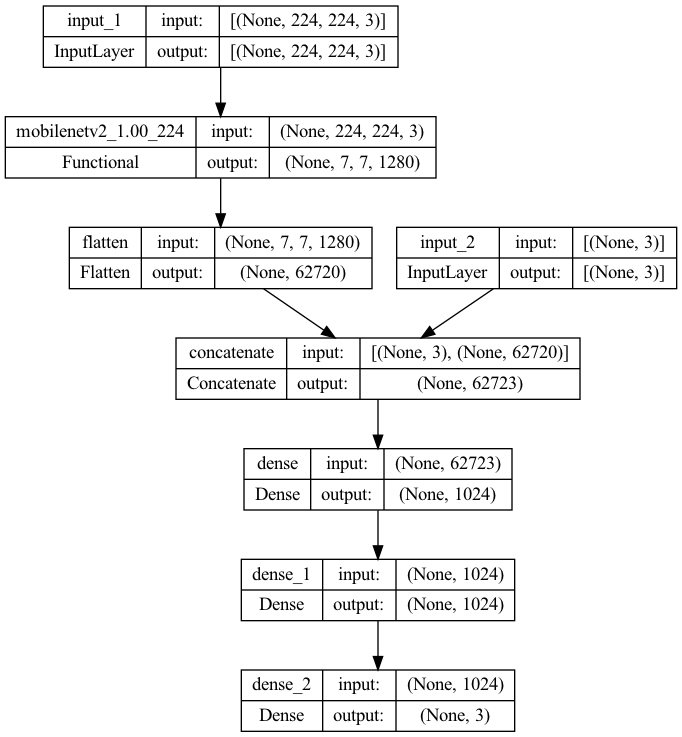

In [6]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [7]:
model.predict([np.zeros((1, 224, 224, 3)), np.zeros((1, 3))])

2022-11-13 09:58:10.150520: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-13 09:58:10.353497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 786ms/step


array([[0.49141315, 0.47408563, 0.03450127]], dtype=float32)